In [ ]:
import torch
import torch.nn as nn
import cv2
import numpy as np
from torchvision import transforms

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, num_classes):
    super(NeuralNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 224, kernel_size=3, stride=1, padding=2)
    self.conv2 = nn.Conv2d(224, 224, kernel_size=3, stride=1, padding=2)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    self.conv3 = nn.Conv2d(224, 112, kernel_size=3, stride=2, padding=1)
    self.conv4 = nn.Conv2d(112, 112, kernel_size=3, stride=1, padding=1)
    self.conv5 = nn.Conv2d(112, 112, kernel_size=3, stride=1, padding=1)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    self.conv6 = nn.Conv2d(112, 56, kernel_size=3, stride=1, padding=1)
    self.conv7 = nn.Conv2d(56, 56, kernel_size=3, stride=1, padding=1)
    self.conv8 = nn.Conv2d(56, 56, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(56*784, 512)  # Adjust the input size based on your data
    self.fc2 = nn.Linear(512, num_classes)  # Output layer with 5 classes


  def forward(self, x): #one sample x
    # out = self.l1(x)
    # out = self.relu(out)
    # out = self.l2(out)
    # return out
    x = torch.relu(self.conv1(x))
    x = torch.relu(self.conv2(x))
    x = self.maxpool1(x)
    x = torch.relu(self.conv3(x))
    x = torch.relu(self.conv4(x))
    x = torch.relu(self.conv5(x))
    x = self.maxpool2(x)
    x = torch.relu(self.conv6(x))
    x = torch.relu(self.conv7(x))
    x = torch.relu(self.conv8(x))
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
# Instantiate the model with the number of classes
model = NeuralNet(num_classes=5)

# Load an image from a file path using OpenCV
image_path = "/content/batman.jpg"
image = cv2.imread(image_path)

# Convert the image to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to match the model's input size and normalize it
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Perform forward propagation by passing the input data through the model to get the output (logits)
output = model(input_data)

# Print the output (logits)
print(output)

tensor([[ 0.0171, -0.0392, -0.0191, -0.0344,  0.0201]],
       grad_fn=<AddmmBackward0>)


In [ ]:
import torch
import torch.nn as nn

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_1x1, out_3x3, out_5x5, out_maxpool):
        super(InceptionModule, self).__init__()

        # 1x1 convolution branch
        self.branch1x1 = nn.Sequential(
            nn.Conv2d(in_channels, out_1x1, kernel_size=1),
            nn.ReLU(inplace=True)
        )

        # 3x3 convolution branch
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(in_channels, out_3x3, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_3x3, out_3x3, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # 5x5 convolution branch
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(in_channels, out_5x5, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_5x5, out_5x5, kernel_size=5, padding=2),
            nn.ReLU(inplace=True)
        )

        # Max-pooling branch
        self.branch_maxpool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_maxpool, kernel_size=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        out1x1 = self.branch1x1(x)
        out3x3 = self.branch3x3(x)
        out5x5 = self.branch5x5(x)
        out_maxpool = self.branch_maxpool(x)

        # Concatenate the outputs from all branches along the channel dimension
        out = torch.cat([out1x1, out3x3, out5x5, out_maxpool], dim=1)

        return out

# Example usage:
in_channels = 64
out_1x1 = 16
out_3x3 = 24
out_5x5 = 8
out_maxpool = 16

inception = InceptionModule(in_channels, out_1x1, out_3x3, out_5x5, out_maxpool)

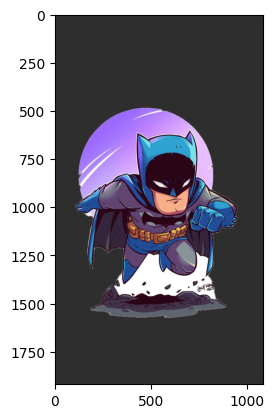

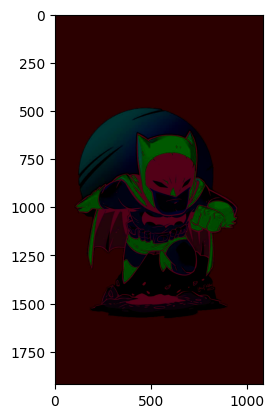

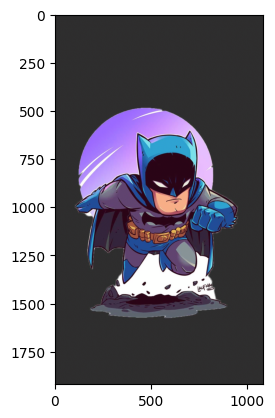

Reconstruction Loss: 4992.653633645892


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/batman.jpg"  # Replace with the path to your image
img = Image.open(image_path).convert('RGB')
img = np.array(img)

# Display the original image
plt.imshow(img)
plt.show()

# Reshape the image data
img_data = img.reshape(-1, 3)

# Perform PCA
mu = np.mean(img_data, axis=0)
img_data = img_data - mu
cov_matrix = np.cov(img_data.T)
eig_values, eig_vec = np.linalg.eig(cov_matrix)

# Sort and select the top k eigenvectors
k = 3  # Adjust this value to set the number of principal components
eig_vec = eig_vec[:, np.argsort(eig_values)[::-1]][:, :k]

# Project the image data onto the k principal components
img_com = img_data @ eig_vec
img_reconstructed = img_com @ eig_vec.T

# Reshape the compressed image and the reconstructed image
k_img = img_com.reshape(img.shape[0], img.shape[1], k)
r_img = img_reconstructed.reshape(img.shape) + mu

# Display the compressed image
plt.imshow(k_img / 255)
plt.show()

# Display the reconstructed image
plt.imshow(r_img / 255)
plt.show()

# Calculate and display the reconstruction loss
loss = np.mean((img_data.reshape(img.shape) - r_img) ** 2)
print(f"Reconstruction Loss: {loss}")


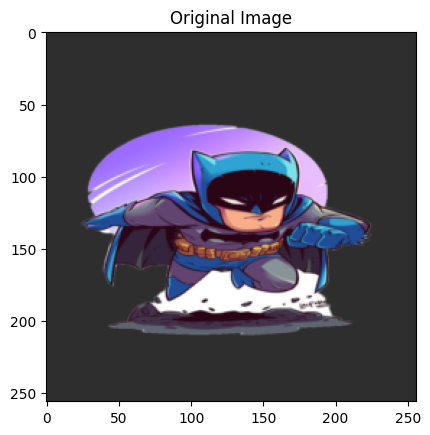

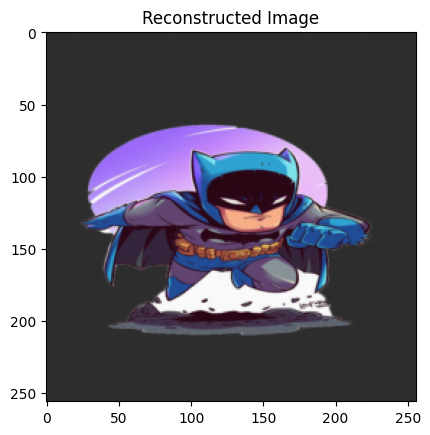

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define a simple autoencoder with linear layers
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),  # Encoding layer 1
            nn.ReLU(),
            nn.Linear(512, 256),  # Encoding layer 2
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),  # Decoding layer 1
            nn.ReLU(),
            nn.Linear(512, input_size),  # Decoding layer 2
            nn.Sigmoid()  # Output layer with Sigmoid activation for pixel values in [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load a sample color image and resize it to the required input size
image = Image.open("/content/batman.jpg")  # Replace with your image path
input_size = 3 * 256 * 256  # Adjust this size based on your model's input size
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
image = transform(image).view(1, input_size)  # Add a batch dimension and flatten

# Initialize the autoencoder and optimizer
autoencoder = Autoencoder(input_size)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    output = autoencoder(image)
    loss = nn.MSELoss()(output, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Display the original and reconstructed images
original_image = image.view(1, 3, 256, 256).squeeze().numpy().transpose(1, 2, 0)
reconstructed_image = output.view(1, 3, 256, 256).squeeze().detach().numpy().transpose(1, 2, 0)

plt.figure()
plt.title("Original Image")
plt.imshow(original_image)
plt.show()

plt.figure()
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.show()
